In [ ]:
import torch
import torchvision
import torchvision.datasets as datasets

from torchvision import transforms
from torch.utils.data import DataLoader
import cv2

import pandas as pd

import numpy as np
import matplotlib.pyplot as pyplot
import math
import matplotlib.pyplot as plt
from PIL import Image

import random

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten

from torchvision.utils import make_grid

import os

In [ ]:
AlexNetModel = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=False)
# AlexNetModel.eval()
model = AlexNetModel

ResNetModel = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=False)

def GetTheAlexNet():
    return torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=False)
    
def GetTheResNet():
    return torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=False)

print(model)
print("Feature layer", model.features[0])
print("Bottleneck layer", model.features[12])

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [ ]:
RandomData = torch.rand((1, 3, 64, 64))
result = model(RandomData)
print (result.shape)

torch.Size([1, 1000])


In [ ]:
isFile = os.path.exists("./tiny-imagenet-200") 
print("data downloaded ", isFile)
if isFile == False:
  !wget "http://cs231n.stanford.edu/tiny-imagenet-200.zip" -O "./tiny-imagenet-200.zip"
  !unzip -u "./tiny-imagenet-200.zip" -d "./"



data downloaded  True


**Preparing Dataset**

In [ ]:
import os
def DataSetPreparation():
    
    rootDir = './tiny-imagenet-200/'
    transformation = transforms.Compose([
        transforms.Resize((256,256)),
        transforms.RandomHorizontalFlip(0.5),
        transforms.RandomVerticalFlip(0.3),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    CompleteData = torchvision.datasets.ImageFolder(
        root=os.path.join(rootDir, 'train'),
        transform=transformation
    )
    
    
    SizeOfData = len(CompleteData) 
    LengthOfTrain = int(0.7 * SizeOfData)
    LengthOfTest = int(0.2 * SizeOfData)
    LengthOfValidation = int(0.1 * SizeOfData)
    
    TrainDataSet, TestDataSet, ValidationDataSet = torch.utils.data.random_split(CompleteData, [LengthOfTrain, LengthOfTest, LengthOfValidation])
    
    train_loader = torch.utils.data.DataLoader(
        TrainDataSet,
        batch_size=50,
        num_workers=0,
        shuffle=False
    )
    
    test_loader = torch.utils.data.DataLoader(
        TestDataSet,
        batch_size=50,
        num_workers=0,
        shuffle=False
    )
    
    
    val_loader = torch.utils.data.DataLoader(
        TestDataSet,
        batch_size=50,
        num_workers=0,
        shuffle=False
    )
    
    return train_loader, test_loader, val_loader    


train_loader,test_loader, val_loader = DataSetPreparation()
device = "cpu"
if (torch.cuda.is_available()):
    device = "cuda"



**with cross-entropy loss**

In [ ]:
LossFunction = torch.nn.CrossEntropyLoss()

In [ ]:

DataTrain = []
LabelTrain = []

BatchCount = 3

Xtrain = Ytrain = Xtest = Ytest = Xval = Yval = None

for BatchIndex, (data, target) in enumerate(train_loader):
        
        DataBatch, TargetsBatch = data.to(device), target.to(device)
        DataTrain.append(DataBatch)
        LabelTrain.append(TargetsBatch)
        if BatchIndex == BatchCount:
            Xtrain = torch.cat(DataTrain, dim=0).numpy()
            Ytrain = torch.cat(LabelTrain, dim=0).numpy()
            break

for BatchIndex, (data, target) in enumerate(test_loader):
        
        DataBatch, TargetsBatch = data.to(device), target.to(device)
        DataTrain.append(DataBatch)
        LabelTrain.append(TargetsBatch)
        if BatchIndex == BatchCount:
            Xtest = torch.cat(DataTrain, dim=0).numpy()
            Ytest = torch.cat(LabelTrain, dim=0).numpy()
            break

for BatchIndex, (data, target) in enumerate(val_loader):
        DataBatch, TargetsBatch = data.to(device), target.to(device)
        DataTrain.append(DataBatch)
        LabelTrain.append(TargetsBatch)
        if BatchIndex == BatchCount:
            Xval = torch.cat(DataTrain, dim=0).numpy()
            Yval = torch.cat(LabelTrain, dim=0).numpy()
            break

In [ ]:
def test(model, x, y):
    pass
    losses = []
    epoch = 14
    batch_size = 10
    SampleSize = min(100, x.shape[0]) 
    TestImages = x[:SampleSize]
    TestLabels = y[:SampleSize]
    permutation = np.random.permutation(SampleSize)
    TestImages_x = TestImages[permutation]
    TestLabels_y = TestLabels[permutation]
    SamplesTotal = len(TestImages_x)
    loss = 0
    LossRunning = 0.
    accuracy = 0
    x = torch.from_numpy(np.array(TestImages_x)).float()
    y = torch.from_numpy(TestLabels_y)
    model.eval()
    outputs = model(x)
    preds = torch.argmax(outputs, dim = 1)
    loss = LossFunction(outputs, y)
    correct_preds = ( preds == y).sum().item()
    accuracy =  correct_preds / SamplesTotal

    print ("Test Loss", loss.item() , "Accuracy", accuracy)
    
    return loss.detach().numpy() , accuracy 

def train(model, Xtrain, Ytrain, epoch):
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    batch_size = 50
    losses = []
    testlosses = []
    LossRunning = 0.
    last_loss = 0.
    SamplesTotal = Xtrain.shape[0]
    SampleSize = SamplesTotal*7//8
    print ("TotalSamples", SamplesTotal, "Size Of Sample", SampleSize)
    
    ImagesTrain = Xtrain[:SampleSize]
    LabelTrain = Ytrain[:SampleSize]
    TestImages = Xtrain[SampleSize:SamplesTotal]
    TestLabels = Ytrain[SampleSize:SamplesTotal]
    for epoch in range(epoch):
        model.train()        
        LossRunning = 0.
        for i in range(SampleSize//batch_size):
            
            start_i = i*batch_size
            end_i = (i+1) * batch_size 
            permutation = np.arange(start_i, end_i, 1)
            
            ImagesTrain_x = ImagesTrain[permutation]
            LabelYtrain = LabelTrain[permutation]

            x = torch.from_numpy(np.array(ImagesTrain_x)).float()
            y = torch.from_numpy(LabelYtrain)
            outputs = model(x)
            preds = torch.argmax(outputs, dim = 1)
            accuracy = 0
            loss = 0
            loss = LossFunction(outputs, y)
            
            SamplesTotal = len(ImagesTrain_x)
            correct_preds = ( preds == y).sum().item()
            accuracy =  correct_preds / SamplesTotal
            LossRunning += loss.item()
            loss.backward()
            optimizer.step()

        EpochLoss = LossRunning / batch_size
        losses.append(EpochLoss)
        
        print("")
        print('Epoch {} Training Loss: {}'.format(epoch + 1, EpochLoss))
        
        testloss, testaccuracy = test(model, TestImages, TestLabels)
        testlosses.append( testloss )
        
    xpoints = np.array(range(len(losses) ))
    plt.plot(xpoints, losses, label="Training Loss" )
    plt.plot(xpoints, testlosses, label="Test Loss" )
    plt.legend(loc="upper right")
    plt.show()
        
    return losses

def TrainingStarts(model ,  epoch = 15):
    SampleSize = 1000 
    batch_size = 100 
    
    ImagesTrain = Xtrain[:SampleSize]
    LabelTrain = Ytrain[:SampleSize]
    
    TestImages = Xtest[:SampleSize]
    TestLabels = Ytest[:SampleSize]
    
    losses = train(model, ImagesTrain, LabelTrain, epoch)
    return losses

**(a) Compute the error on the training and test data sets. Plot the training and test errors as a function of epochs (at the end of
training). (1)**

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


TotalSamples 200 Size Of Sample 175

Epoch 1 Training Loss: 0.41438831329345704
Test Loss 6.907427787780762 Accuracy 0.0

Epoch 2 Training Loss: 0.41439678192138674
Test Loss 6.907055854797363 Accuracy 0.0

Epoch 3 Training Loss: 0.41432884216308596
Test Loss 6.906257152557373 Accuracy 0.0

Epoch 4 Training Loss: 0.41422435760498044
Test Loss 6.904926300048828 Accuracy 0.0

Epoch 5 Training Loss: 0.41406341552734377
Test Loss 6.902980804443359 Accuracy 0.0

Epoch 6 Training Loss: 0.41381446838378905
Test Loss 6.900373935699463 Accuracy 0.04

Epoch 7 Training Loss: 0.4134880542755127
Test Loss 6.8970489501953125 Accuracy 0.04

Epoch 8 Training Loss: 0.41308753967285156
Test Loss 6.892966270446777 Accuracy 0.04

Epoch 9 Training Loss: 0.41260159492492676
Test Loss 6.888071060180664 Accuracy 0.04

Epoch 10 Training Loss: 0.41202309608459475
Test Loss 6.882323741912842 Accuracy 0.04


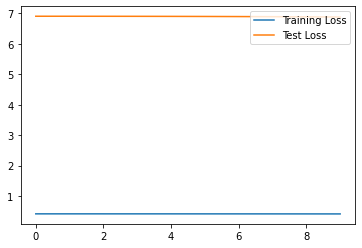

[0.41438831329345704, 0.41439678192138674, 0.41432884216308596, 0.41422435760498044, 0.41406341552734377, 0.41381446838378905, 0.4134880542755127, 0.41308753967285156, 0.41260159492492676, 0.41202309608459475]


In [ ]:
model = GetTheAlexNet()
losses = train(model, Xtrain, Ytrain,10)
print(losses)

In [ ]:
def TestingStarts(model):
    pass
    losses = []
    SampleSize = 100
    batch_size = 10
    epoch = 15
    TestImages = Xtest[:SampleSize]
    TestLabels = Ytest[:SampleSize]
    permutation = np.random.permutation(SampleSize)

    TestImages_x = TestImages[permutation]
    TestLabels_y = TestLabels[permutation]
    
    loss , accuracy  = test(model, TestImages_x, TestLabels_y)
    return loss , accuracy

TestingStarts(model)


Test Loss 6.858243465423584 Accuracy 0.02


(array(6.8582435, dtype=float32), 0.02)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


TotalSamples 200 Size Of Sample 175

Epoch 1 Training Loss: 0.41439430236816405
Test Loss 6.909862518310547 Accuracy 0.0

Epoch 2 Training Loss: 0.41436259269714354
Test Loss 6.909492015838623 Accuracy 0.0

Epoch 3 Training Loss: 0.41433186531066896
Test Loss 6.908698558807373 Accuracy 0.0

Epoch 4 Training Loss: 0.41422533988952637
Test Loss 6.907377243041992 Accuracy 0.0

Epoch 5 Training Loss: 0.4140526485443115
Test Loss 6.905451774597168 Accuracy 0.0

Epoch 6 Training Loss: 0.413816442489624
Test Loss 6.90286922454834 Accuracy 0.0

Epoch 7 Training Loss: 0.4135209846496582
Test Loss 6.899577617645264 Accuracy 0.0

Epoch 8 Training Loss: 0.413138370513916
Test Loss 6.895544052124023 Accuracy 0.0

Epoch 9 Training Loss: 0.4126658535003662
Test Loss 6.8907551765441895 Accuracy 0.0

Epoch 10 Training Loss: 0.41209802627563474
Test Loss 6.885184288024902 Accuracy 0.0


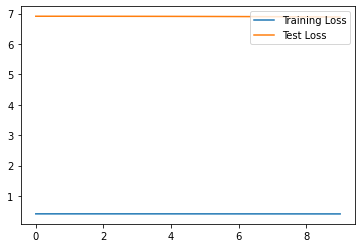

Training
loss 0.41209802627563474
Test Loss 6.859744071960449 Accuracy 0.02
Testing
accuracy 0.02 loss 6.859744


In [ ]:
model = GetTheAlexNet()
training_loss = TrainingStarts(model, epoch = 10)
print ("Training")
print("loss", training_loss[-1] )

loss, accuracy = TestingStarts(model)
print ("Testing")
print("accuracy", accuracy, "loss" , loss)

**(b) Visualize the activation maps of the trained model. You can pick a couple of representative slices from the activation
volumes at a couple of convolution layers. (1)**

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


TotalSamples 200 Size Of Sample 175

Epoch 1 Training Loss: 0.4145199298858643
Test Loss 6.908000946044922 Accuracy 0.0


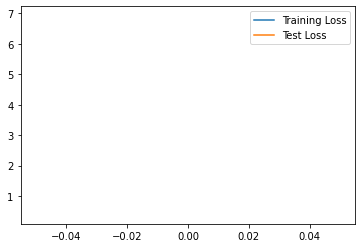

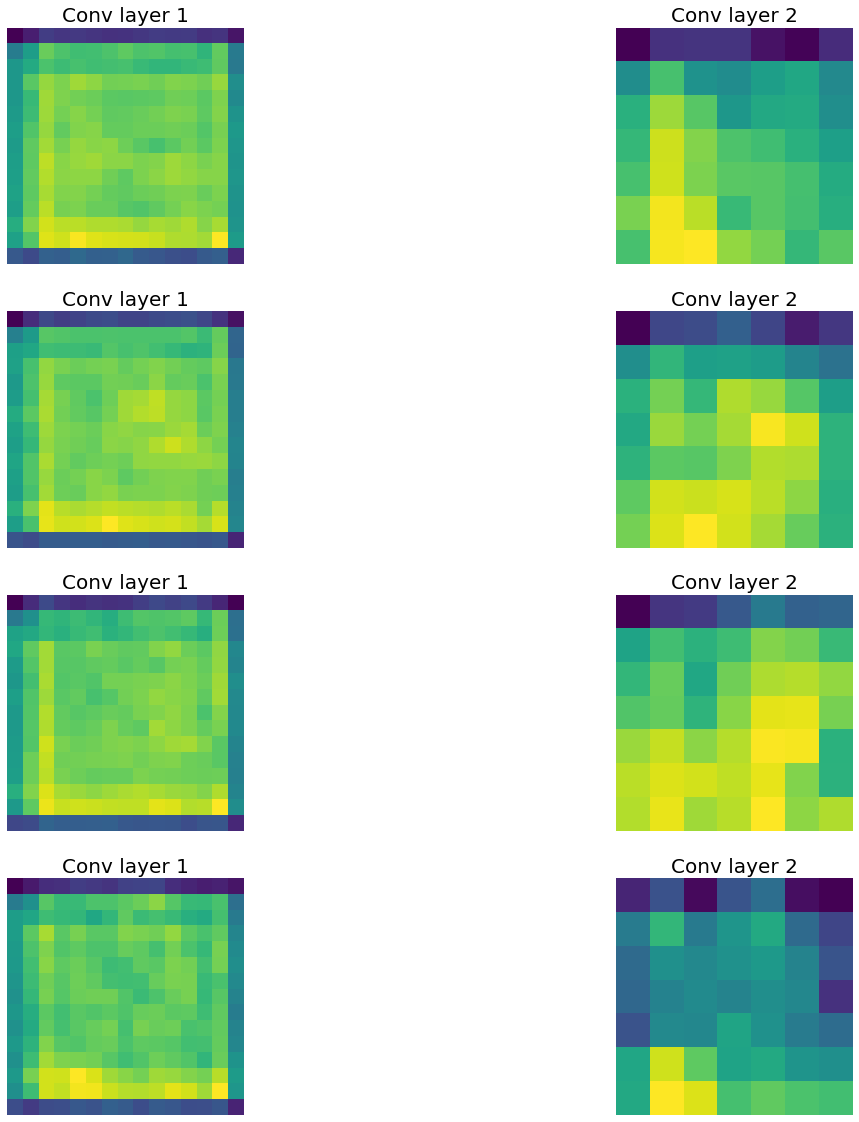

In [ ]:
outputimages_conv1 = []
outputimages_conv2 = []

def DisplayConv1(self, input, output):
    ActivationMap = output
    ActivationMap = ActivationMap.squeeze(0)
    gray_scale = torch.sum(ActivationMap,0)
    gray_scale = gray_scale / ActivationMap.shape[0]
    outputimages_conv1.append(gray_scale.data.cpu().numpy())

def DisplayConv2(self, input, output):
    ActivationMap = output
    ActivationMap = ActivationMap.squeeze(0)
    gray_scale = torch.sum(ActivationMap,0)
    gray_scale = gray_scale / ActivationMap.shape[0]
    outputimages_conv2.append(gray_scale.data.cpu().numpy())
model = GetTheAlexNet()

model.features[10].register_forward_hook(DisplayConv1)
model.features[12].register_forward_hook(DisplayConv2)

VanilaLoss =TrainingStarts(model, epoch = 1)
fig = plt.figure(figsize=(20, 20))
cols = 2
ImagesToDisplay = min(8,len(outputimages_conv1))
rows = ImagesToDisplay // 2 * cols
 
for i in range(ImagesToDisplay):
    a = fig.add_subplot(rows, cols, i*2+1)
    a.axis('off')
    imgplot = plt.imshow(outputimages_conv1[i][0])
    a.set_title("Conv layer 1", fontsize=20)
    
    a = fig.add_subplot(rows, cols, i*2+2)
    a.axis('off')
    imgplot = plt.imshow(outputimages_conv2[i][0])
    a.set_title("Conv layer 2", fontsize=20)

    
outputimages_conv1 = []
outputimages_conv2 = []

**(c) Report the accuracy of your classifier. (1)**

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
loss, accuracy = TestingStarts(model)
print("Testing Accuracy", accuracy)
print("Testing loss" , loss)

Test Loss 6.907781600952148 Accuracy 0.0
Testing Accuracy 0.0
Testing loss 6.9077816


**(d) Use tSNE to visualize the bottleneck feature at the end of the first epoch and the last epoch. (1)**

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


(100, 3, 256, 256) (100,)
(10, 3, 256, 256) (10,)
unravelled vector (10, 100, 9216)
(1, 100, 9216) (1, 100)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
No handles with labels found to put in legend.


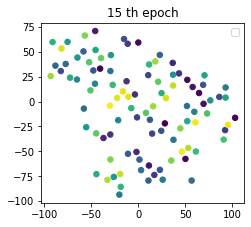

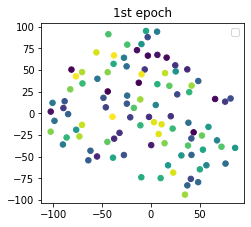

In [ ]:
from sklearn.manifold import TSNE
from sklearn import datasets
from sklearn.manifold import TSNE
import pandas as pd
from collections import defaultdict

def testing_for_tsne(model):

    SampleSize = min(100, Xtest.shape[0]) #100
    
    batch_size = 10
    epoch = 15
    losses = []
    
    TestImages = Xtest[:SampleSize]
    TestLabels = Ytest[:SampleSize]
    
    permutation = np.random.permutation(SampleSize)

    TestImages_x = TestImages[permutation]
    TestImages_y = TestLabels[permutation]

    SamplesTotal = len(TestImages_x)
    x = torch.from_numpy(np.array(TestImages_x)).float()
    y = torch.from_numpy(TestImages_y) 

    model.eval()
    outputs = model(x)
    preds = torch.argmax(outputs, dim = 1)    
    
    labels = TestImages_y
    return np.array(labels)

def training_tsne(model):
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    
    SampleSize = min(100, Xtrain.shape[0]) 
    batch_size = 10 #100
    epoch = 10
    
    ImagesTrain = Xtrain[:SampleSize]
    LabelTrain = Ytrain[:SampleSize]

    TestImages = Xtest[:SampleSize//10]
    TestLabels = Ytest[:SampleSize//10]

    print(ImagesTrain.shape, LabelTrain.shape)
    print(TestImages.shape, TestLabels.shape)
      
    LossRunning = 0.
    last_loss = 0.
    losses = []
    testlosses = []
    
    labels = []
    for epoch in range(epoch):
       
        model.train()
        LossRunning = 0.
        for i in range(SampleSize//batch_size):
            
            optimizer.zero_grad()
            
            start_i = i*batch_size
            end_i = (i+1) * batch_size 
            permutation = np.arange(start_i, end_i, 1)
            
            
            ImagesTrain_x = ImagesTrain[permutation]
            LabelYtrain = LabelTrain[permutation]
            accuracy = 0
            loss = 0

            x = torch.from_numpy(np.array(ImagesTrain_x)).float()
            y = torch.from_numpy(LabelYtrain) 
            outputs = model(x)
            loss = LossFunction(outputs, y)
            LossRunning += loss.item()

            loss.backward()
            optimizer.step()
        EpochLoss = LossRunning / batch_size
        losses.append(EpochLoss)
        
        TestLabels_y = testing_for_tsne(model)
        
        labels.append(TestLabels_y)
    
    return np.array(labels)
UnravelledOutputVector = []
def collect_unravelled_output(self, input, output):
    if self.training:
        pass
    else:
        unravelled_output = output.detach().numpy()
        UnravelledOutputVector.append(unravelled_output)
model = GetTheAlexNet()
model.classifier[0].register_forward_hook(collect_unravelled_output)
global UnravelledOutputVector
UnravelledOutputVector = []
labels = training_tsne(model)
UnravelledOutputVector = np.asarray(UnravelledOutputVector)
print ("unravelled vector", UnravelledOutputVector.shape)

sne_input = np.array( [UnravelledOutputVector[-1] ] )
LabelIndexes = np.array([labels[-1] ] )

print (sne_input.shape, LabelIndexes.shape)
df = pd.DataFrame(np.row_stack(sne_input[0]))
plt.figure(figsize = (8,4))
plt.subplots_adjust(top = 1.5)

tsne = TSNE(n_components = 2, perplexity = 10, random_state=0)
tsne_results = tsne.fit_transform(df)
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
index = 0
plt.subplot(2,2,index+1)
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=LabelIndexes, s=30)
plt.title('15 th epoch')
plt.legend(loc="upper right")
sne_input = np.array( [UnravelledOutputVector[0] ] )
LabelIndexes = np.array([labels[0] ] )

df = pd.DataFrame(np.row_stack(sne_input[0]))

plt.figure(figsize = (8,4))
plt.subplots_adjust(top = 1.5)

tsne = TSNE(n_components = 2, perplexity = 10, random_state=0)
tsne_results = tsne.fit_transform(df)
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
index = 0
plt.subplot(2,2,index+1)
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=LabelIndexes, s=30)
plt.title('1st epoch')
plt.legend(loc="upper right")

**(e) Compare the performance of the two models in terms of the accuracy and training time (number of epochs) required for
the Training Loss to stabilize. Comment on which model you would pick for this task considering a trade-off between
performance and the number of parameters. (1)**

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Alexnet Training 
TotalSamples 200 Size Of Sample 175

Epoch 1 Training Loss: 0.4144845485687256
Test Loss 6.907320022583008 Accuracy 0.0

Epoch 2 Training Loss: 0.41445796012878416
Test Loss 6.906960487365723 Accuracy 0.0

Epoch 3 Training Loss: 0.41442070007324217
Test Loss 6.906186103820801 Accuracy 0.04

Epoch 4 Training Loss: 0.4142987632751465
Test Loss 6.904896259307861 Accuracy 0.04

Epoch 5 Training Loss: 0.41415714263916015
Test Loss 6.903016567230225 Accuracy 0.0

Epoch 6 Training Loss: 0.41390615463256836
Test Loss 6.900495529174805 Accuracy 0.0

Epoch 7 Training Loss: 0.4135867023468018
Test Loss 6.8972907066345215 Accuracy 0.0

Epoch 8 Training Loss: 0.41321386337280275
Test Loss 6.893366813659668 Accuracy 0.0

Epoch 9 Training Loss: 0.4127408313751221
Test Loss 6.888695240020752 Accuracy 0.0

Epoch 10 Training Loss: 0.41216623306274414
Test Loss 6.883245468139648 Accuracy 0.04


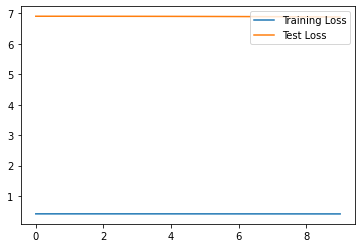

Test Loss 6.860028266906738 Accuracy 0.02
Training ResNet
TotalSamples 200 Size Of Sample 175


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0



Epoch 1 Training Loss: 0.41789803504943845
Test Loss 6.90908670425415 Accuracy 0.0

Epoch 2 Training Loss: 0.4115616798400879
Test Loss 6.881185531616211 Accuracy 0.0

Epoch 3 Training Loss: 0.3976743793487549
Test Loss 6.810678005218506 Accuracy 0.0

Epoch 4 Training Loss: 0.37245718002319333
Test Loss 6.641560077667236 Accuracy 0.0

Epoch 5 Training Loss: 0.33885847091674803
Test Loss 6.334399223327637 Accuracy 0.0

Epoch 6 Training Loss: 0.3110825061798096
Test Loss 7.826682090759277 Accuracy 0.0

Epoch 7 Training Loss: 0.30762826919555664
Test Loss 12.459776878356934 Accuracy 0.0

Epoch 8 Training Loss: 0.32121933937072755
Test Loss 18.03143882751465 Accuracy 0.0

Epoch 9 Training Loss: 0.324209623336792
Test Loss 24.363889694213867 Accuracy 0.0

Epoch 10 Training Loss: 0.32967219352722166
Test Loss 47.26169967651367 Accuracy 0.0


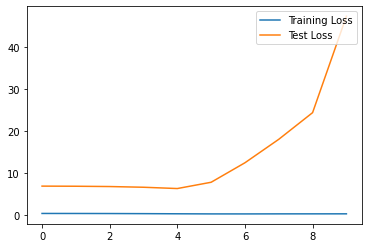

Test Loss 28.89666175842285 Accuracy 0.04


In [ ]:
#alexnet

model = GetTheAlexNet()
print ("Alexnet Training ")
losses = train(model, Xtrain, Ytrain, epoch=10 )
loss, accuracy = test(model, Xtest, Ytest)
model = GetTheResNet()
print ("Training ResNet")
losses = train(model, Xtrain, Ytrain, epoch=10 )
loss, accuracy = test(model, Xtest, Ytest)

**Q.2 a)**

**preparing data**

In [ ]:
isFile = os.path.exists("./data") 
print("data downloaded ", isFile)
if isFile == False:
  !wget "https://download.pytorch.org/tutorial/data.zip" -O "./data.zip"
  !unzip -u "./data.zip" -d "./"

data downloaded  False
--2022-05-04 22:04:21--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.224.160.89, 13.224.160.98, 13.224.160.39, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.224.160.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘./data.zip’

./data.zip          100%[===================>]   2.75M  --.-KB/s    in 0.08s   

2022-05-04 22:04:21 (34.2 MB/s) - ‘./data.zip’ saved [2882130/2882130]

Archive:  ./data.zip
   creating: ./data/
  inflating: ./data/eng-fra.txt      
   creating: ./data/names/
  inflating: ./data/names/Arabic.txt  
  inflating: ./data/names/Chinese.txt  
  inflating: ./data/names/Czech.txt  
  inflating: ./data/names/Dutch.txt  
  inflating: ./data/names/English.txt  
  inflating: ./data/names/French.txt  
  inflating: ./data/names/German.txt  
  inflating: ./data/names/Greek.txt  
  inflating: ./data/name

In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string

AllLetters = string.ascii_letters + " .,;'"
n_letters = len(AllLetters)

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in AllLetters
    )

print(unicodeToAscii('Ślusàrski'))
AllCategories = []
CategoryLines = {}
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    AllCategories.append(category)
    lines = readLines(filename)
    CategoryLines[category] = lines

NoofCategories = len(AllCategories)

['data/names/Polish.txt', 'data/names/Italian.txt', 'data/names/Portuguese.txt', 'data/names/Scottish.txt', 'data/names/Irish.txt', 'data/names/French.txt', 'data/names/Arabic.txt', 'data/names/German.txt', 'data/names/Spanish.txt', 'data/names/Japanese.txt', 'data/names/Vietnamese.txt', 'data/names/Korean.txt', 'data/names/Russian.txt', 'data/names/Greek.txt', 'data/names/English.txt', 'data/names/Chinese.txt', 'data/names/Dutch.txt', 'data/names/Czech.txt']
Slusarski


In [ ]:
print(CategoryLines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [ ]:
import torch

def Lettertoindex(letter):
    return AllLetters.find(letter)
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][Lettertoindex(letter)] = 1
    return tensor
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][Lettertoindex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [ ]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, NoofCategories)

In [ ]:
input = letterToTensor('A')
print ("input ", input)
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

input  tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])


In [ ]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)
output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.9947, -2.9533, -2.9120, -2.8472, -3.0186, -2.9052, -2.7984, -2.8715,
         -2.9512, -2.8732, -2.8229, -2.8949, -2.8085, -2.9244, -2.8100, -2.9157,
         -2.9345, -2.8266]], grad_fn=<LogSoftmaxBackward0>)


In [ ]:
def categoryOutput(output):
    top_n, top_i = output.topk(1)
    categoryI = top_i[0].item()
    return AllCategories[categoryI], categoryI

print(categoryOutput(output))

('Arabic', 6)


In [ ]:
import random

def ChooseRandom(l):
    return l[random.randint(0, len(l) - 1)]

def TrainingExampleRandom():
    category = ChooseRandom(AllCategories)
    line = ChooseRandom(CategoryLines[category])
    TensorCategory = torch.tensor([AllCategories.index(category)], dtype=torch.long)
    TensorLine = lineToTensor(line)
    return category, line, TensorCategory, TensorLine

for i in range(10):
    category, line, TensorCategory, TensorLine = TrainingExampleRandom()
    print('category =', category, '/ line =', line)

category = Italian / line = Durante
category = Korean / line = Jung 
category = Russian / line = Rahov
category = Chinese / line = Chu
category = Russian / line = Rahmatullin
category = French / line = Tremblay
category = Greek / line = Kouros
category = Dutch / line = Michel
category = English / line = Heywood
category = Spanish / line = Santana


In [ ]:
criterion = nn.NLLLoss()

**Train RNN**

In [ ]:
Lr = 0.005 

def train_rnn(rnn, TensorCategory, TensorLine):
    
    if isinstance(rnn, RNN) :
        hidden = rnn.initHidden()
    else:
        hidden = rnn.initHidden(TensorLine.size()[0])
        
    rnn.zero_grad()

    for i in range(TensorLine.size()[0]):
        output, hidden = rnn(TensorLine[i], hidden)

    loss = criterion(output, TensorCategory)
    loss.backward()

    
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-Lr)

    return output, loss.item()

In [ ]:
import time
import math

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def SinceTime(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

def RnnTrainStarts(rnn):
    start = time.time()
    AllLosses = []
    Noofiters = 100000
    printEvery = 5000
    plotEvery = 1000
    CurrentLoss = 0
    

    for iter in range(1, Noofiters + 1):
        category, line, TensorCategory, TensorLine = TrainingExampleRandom()
        
        output, loss = train_rnn(rnn, TensorCategory, TensorLine)
        CurrentLoss += loss
        if iter % printEvery == 0:
            guess, guess_i = categoryOutput(output)
            correct = '✓' if guess == category else '✗ (%s)' % category
            print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / Noofiters * 100, SinceTime(start), loss, line, guess, correct))

        if iter % plotEvery == 0:
            AllLosses.append(CurrentLoss / plotEvery)
            CurrentLoss = 0
        
    plt.figure()
    plt.plot(AllLosses)

    return AllLosses
            


5000 5% (0m 5s) 2.4491 Forestier / German ✗ (French)
10000 10% (0m 10s) 1.2447 Houlis / Greek ✓
15000 15% (0m 15s) 1.3125 Weber / German ✓
20000 20% (0m 20s) 0.8220 Noh / Korean ✓
25000 25% (0m 25s) 1.2545 Meeuwessen / Dutch ✓
30000 30% (0m 30s) 2.3700 Flynn / Scottish ✗ (Irish)
35000 35% (0m 35s) 0.1469 Jadanovsky / Russian ✓
40000 40% (0m 40s) 1.2811 Thien / Vietnamese ✗ (Chinese)
45000 45% (0m 45s) 0.5823 Monahan / Irish ✓
50000 50% (0m 50s) 3.7864 Collins / Greek ✗ (Irish)
55000 55% (0m 55s) 2.4934 Suaird / French ✗ (Irish)
60000 60% (1m 0s) 0.9759 Kattan / Arabic ✓
65000 65% (1m 5s) 0.0702 Egonidis / Greek ✓
70000 70% (1m 10s) 1.9626 Proulx / English ✗ (French)
75000 75% (1m 15s) 1.5553 Ferreira / Spanish ✗ (Portuguese)
80000 80% (1m 20s) 0.2430 Suk / Korean ✓
85000 85% (1m 25s) 1.1636 Siegel / German ✓
90000 90% (1m 30s) 0.2200 Ron / Korean ✓
95000 95% (1m 35s) 0.5504 Kubo / Japanese ✓
100000 100% (1m 40s) 1.0708 Trujillo / Spanish ✓


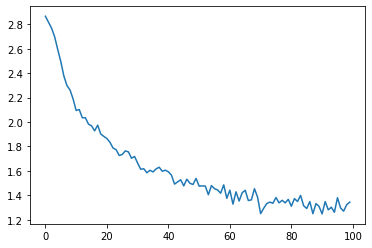

In [ ]:
AllLosses = RnnTrainStarts(rnn)


**validate rnn**

In [ ]:

def Eval(rnn, TensorLine):
    hidden = rnn.initHidden()
    for i in range(TensorLine.size()[0]):
        output, hidden = rnn(TensorLine[i], hidden)

    return output

def EvalutionStarts(rnn):
    confusion = torch.zeros(NoofCategories, NoofCategories)
    Nconfuse = 10000
    for i in range(Nconfuse):
        category, line, TensorCategory, TensorLine = TrainingExampleRandom()
        output = Eval(rnn, TensorLine)
        guess, guess_i = categoryOutput(output)
        categoryI = AllCategories.index(category)
        confusion[categoryI][guess_i] += 1
    for i in range(NoofCategories):
        confusion[i] = confusion[i] / confusion[i].sum()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(confusion.numpy())
    fig.colorbar(cax)
    ax.set_xticklabels([''] + AllCategories, rotation=90)
    ax.set_yticklabels([''] + AllCategories)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.show()
    
    return confusion

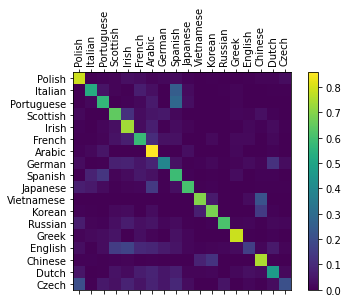

In [ ]:
confusion = EvalutionStarts(rnn)

 **(b) Replace the RNN in the previous question with a GRU and report the classification performance. GRU help can be found
here. (5)**

GRU Training
500 5% (0m 2s) 1.5064 Wang / Korean ✓
1000 10% (0m 6s) 2.0635 Milne / French ✗ (Scottish)
1500 15% (0m 9s) 2.1723 Sgro / Portuguese ✗ (Italian)
2000 20% (0m 11s) 1.5667 Yong / Korean ✗ (Chinese)
2500 25% (0m 14s) 0.2157 Koo / Korean ✓
3000 30% (0m 16s) 4.6866 Albert / German ✗ (Spanish)
3500 35% (0m 18s) 2.8542 Mar / Arabic ✗ (Chinese)
4000 40% (0m 20s) 4.2360 Donnell / Czech ✗ (Irish)
4500 45% (0m 22s) 0.2782 Pefanis / Greek ✓
5000 50% (0m 24s) 0.4929 Sui / Chinese ✓
5500 55% (0m 26s) 1.2891 Baik / Chinese ✗ (Korean)
6000 60% (0m 28s) 0.1416 Tanizaki / Japanese ✓
6500 65% (0m 31s) 0.0862 Trinh / Vietnamese ✓
7000 70% (0m 33s) 0.6378 Forestier / French ✓
7500 75% (0m 35s) 3.0741 Tron / English ✗ (Vietnamese)
8000 80% (0m 37s) 2.5076 Charron / English ✗ (French)
8500 85% (0m 39s) 2.8498 Pey / Korean ✗ (Dutch)
9000 90% (0m 41s) 0.0764 Oh  / Korean ✓
9500 95% (0m 43s) 2.3788 Mihalchuk / Czech ✗ (Russian)
10000 100% (0m 45s) 1.8003 Kennedy / English ✗ (Scottish)


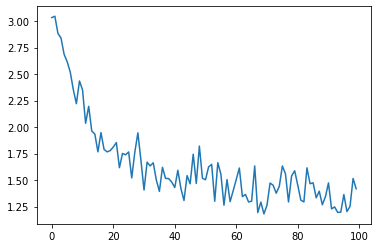

In [ ]:
class GRUNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, NoofLayers, drop_prob=0.2):
        super(GRUNet, self).__init__()
        self.hidden_size = hidden_size
        self.NoofLayers = NoofLayers
        
        self.num_layers = NoofLayers
        self.hidden_size = hidden_size
        self.gru = nn.GRU(
            input_size=input_size, 
            hidden_size=hidden_size, 
            num_layers=NoofLayers,
        )
        self.fc = nn.Linear(hidden_size, output_size)
        
        
    def forward(self, x, h):
        hidden_state = self.initHidden(1)
        output, hidden_state = self.gru(x, hidden_state)
        output = self.fc(output[-1])
        return output, hidden
    
    def initHidden(self):
         return torch.zeros(self.NoofLayers, 1, self.hidden_size)
        
    def initHidden(self, batch_size =1):
         return torch.zeros(self.NoofLayers, 1, self.hidden_size)
    
NoofLayers = 2
gru = GRUNet(n_letters, n_hidden, NoofCategories,  NoofLayers = NoofLayers)
optimizer = torch.optim.Adam(gru.parameters(), lr=Lr)
h0 = torch.randn(NoofCategories, 10, n_hidden  )

print("GRU Training")
criterion = nn.CrossEntropyLoss()
start = time.time()

Noofiters = 10000
printEvery = 500
plotEvery = 100

CurrentLoss = 0
AllLosses = []
    

CurrentLoss = 0
for iter in  range(1, Noofiters + 1):
    category, line, TensorCategory, TensorLine = TrainingExampleRandom()
    output, hidden = gru(TensorLine, h0)
    loss = criterion(output, TensorCategory)
    CurrentLoss += loss.item()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if iter % printEvery == 0:
        guess, guess_i = categoryOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / Noofiters * 100, SinceTime(start), loss, line, guess, correct))

    if iter % plotEvery == 0:
        AllLosses.append(CurrentLoss / plotEvery)
        CurrentLoss = 0
        
plt.figure()
plt.plot(AllLosses)
        


Confusion matrix GRU


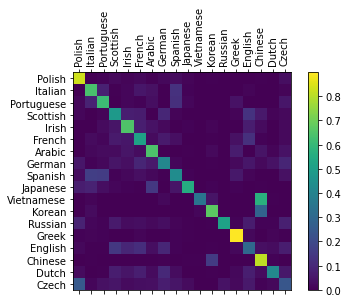

In [ ]:
def EvalutionStarts_gru_lstm(rnn):
    confusion = torch.zeros(NoofCategories, NoofCategories)
    Nconfuse = 10000

    for i in range(Nconfuse):
        category, line, TensorCategory, TensorLine = TrainingExampleRandom()
        output, hidden =  gru(TensorLine, h0)
        guess, guess_i = categoryOutput(output)
        categoryI = AllCategories.index(category)
        confusion[categoryI][guess_i] += 1
    for i in range(NoofCategories):
        confusion[i] = confusion[i] / confusion[i].sum()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(confusion.numpy())
    fig.colorbar(cax)
    ax.set_xticklabels([''] + AllCategories, rotation=90)
    ax.set_yticklabels([''] + AllCategories)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.show()
    
    return confusion
print ( "Confusion matrix GRU")
confusion = EvalutionStarts_gru_lstm(gru)

**(c) Replace the GRU in the previous question with an LSTM and report the classification performance. LSTM help can be
found here. (5)**

LSTM training
500 5% (1m 10s) 2.7956 Gallchobhar / Dutch ✗ (Irish)
1000 10% (1m 13s) 1.9749 Bartolomei / Italian ✓
1500 15% (1m 15s) 0.3910 Piontek / Polish ✓
2000 20% (1m 17s) 1.5788 Havener / German ✓
2500 25% (1m 20s) 0.0215 Nomikos / Greek ✓
3000 30% (1m 22s) 2.0833 Arthur / Irish ✗ (English)
3500 35% (1m 24s) 2.1557 Berg / German ✗ (Dutch)
4000 40% (1m 27s) 0.9548 Chun / Chinese ✗ (Korean)
4500 45% (1m 30s) 3.3006 Muso / Korean ✗ (Japanese)
5000 50% (1m 33s) 1.8085 Jiang / Vietnamese ✗ (Chinese)
5500 55% (1m 36s) 0.9849 Leroy / Scottish ✗ (French)
6000 60% (1m 38s) 0.4605 Ku / Korean ✓
6500 65% (1m 41s) 1.6758 Chung / Vietnamese ✗ (Korean)
7000 70% (1m 43s) 2.0933 Sturgess / Portuguese ✗ (English)
7500 75% (1m 46s) 1.9585 Palomer / German ✗ (French)
8000 80% (1m 48s) 7.2087 De santis / Greek ✗ (Italian)
8500 85% (1m 50s) 0.5770 Morello / Italian ✓
9000 90% (1m 53s) 0.2317 Christie / Scottish ✓
9500 95% (1m 55s) 0.5059 Sauveterre / French ✓
10000 100% (1m 58s) 0.0456 Rooijakkers / 

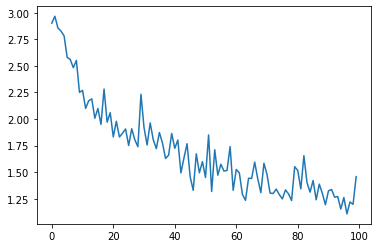

In [ ]:
device = "cpu"
class LSTMNet(nn.Module):
    def __init__(self,  input_size, hidden_size, output_size, NoofLayers, drop_prob=0.2):
        super(LSTMNet, self).__init__()
        self.hidden_size = input_size
        self.NoofLayers = NoofLayers
        
        self.num_layers = NoofLayers
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(
            input_size=input_size, 
            hidden_size=hidden_size, 
            num_layers=NoofLayers,
        )
        self.fc = nn.Linear(hidden_size, output_size)
        
        
    def forward(self, x, h):
        hidden_state = self.initHidden(1)
        output, hidden_state = self.lstm(x, hidden_state)
        output = self.fc(output[-1])
        
        return output, hidden_state
    
    def initHidden(self):
         return torch.zeros(self.NoofLayers, 1, self.hidden_size)
        
    def initHidden(self, batch_size =1):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.NoofLayers, batch_size, self.hidden_size).zero_().to(device),
                  weight.new(self.NoofLayers, batch_size, self.hidden_size).zero_().to(device))
        return hidden   
lstm = LSTMNet(n_letters, n_hidden, NoofCategories,  NoofLayers = NoofLayers)
optimizer = torch.optim.Adam(lstm.parameters(), lr=Lr)

print( "LSTM training")
AllLosses = []
CurrentLoss = 0
for iter in  range(1, Noofiters + 1):
    category, line, TensorCategory, TensorLine = TrainingExampleRandom()
    output, hidden = lstm(TensorLine, h0)
    loss = criterion(output, TensorCategory)
    CurrentLoss += loss.item()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if iter % printEvery == 0:
        guess, guess_i = categoryOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / Noofiters * 100, SinceTime(start), loss, line, guess, correct))

    if iter % plotEvery == 0:
        AllLosses.append(CurrentLoss / plotEvery)
        CurrentLoss = 0
        
plt.figure()
plt.plot(AllLosses)
   

LSTM Confusion matrix 


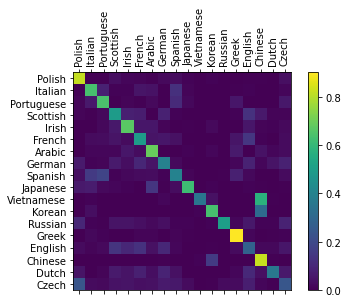

In [ ]:
print ("LSTM Confusion matrix ")
confusion = EvalutionStarts_gru_lstm(lstm)